In [23]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# Importing the required libraries for creating a model and testing it

# Used for working with arrays
import numpy as np  

# It is used for data manipulation and analysis
import pandas as pd 

# Stands for Operating System used to work with the operating system
import os   

# It is for fast computation of data
import tensorflow as tf 

 # Used to process Images
from keras.preprocessing.image import ImageDataGenerator, load_img 

# Used for computation of data
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten  

# To Optimize the model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD  

# Working with model 
from keras import regularizers  

# Importing modules to work with the model
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau

# Working with date and time
import datetime  

# Used for visualization of data
import matplotlib.pyplot as plt   

# For ploting a model
from tensorflow.keras.utils import plot_model  

In [24]:
# Defining the Model

def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    # creating a Sequential model incrementally via the add() method
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))  # Creating a convolution kernel producing a tensor of outputs
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())  # Applies a transformation to data to normalize it
    model.add(MaxPooling2D(2, 2))    # Downsampling the input along its spatial dimensions
    model.add(Dropout(0.25))         # Applying Dropout to the input data
    
    # Applying the rectified linear unit activation 
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Flatenning the data
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    # Returning the model
    return model

In [40]:
# Specifying the size of images as 48 x 48
row, col = 48, 48

# There are 7 types of emotions in the dataset
classes = 7 
fernet = get_model((row,col,1), classes)
fernet.save_weights("/content/Model_bestweight.h5")
# fernet.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


happy


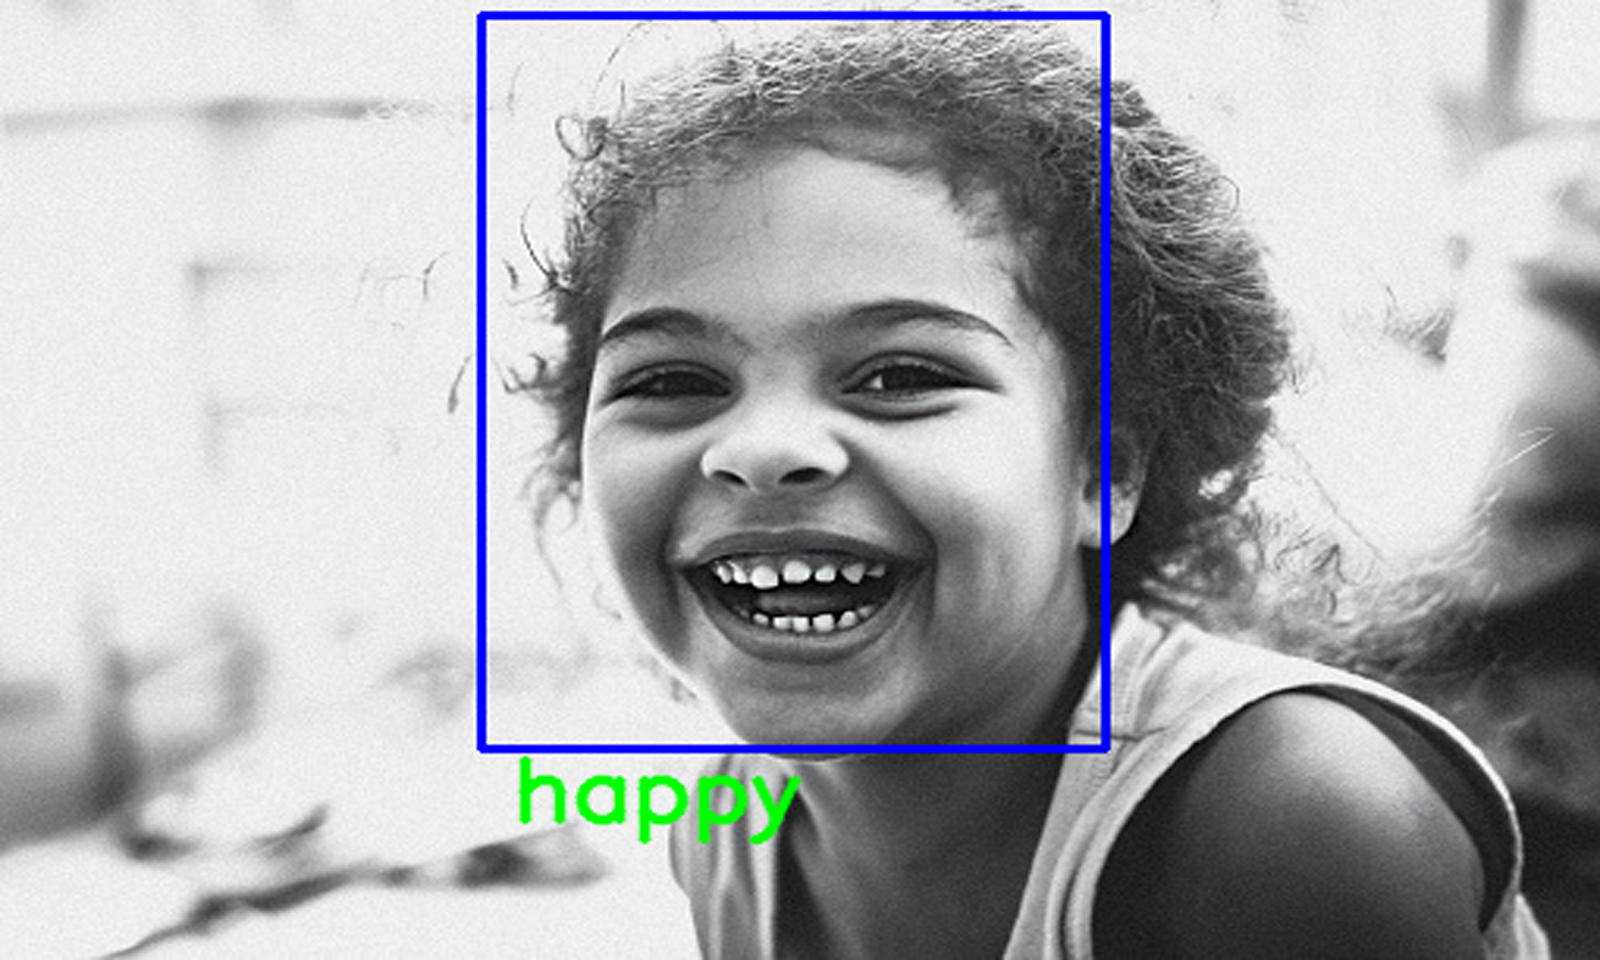

In [42]:
cap = cv2.VideoCapture("/content/happy.jpeg")

# Uncomment the next line if you want to activate the video from the web cam.
# cap = cv2.VideoCapture(0)
# The video option is not available in the google colab so we are using a image as video source.

from google.colab.patches import cv2_imshow
emotion_dict = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.05, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = fernet.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        print(emotion_dict[maxindex])
        cv2.putText(frame, emotion_dict[maxindex], (x+10, y+h+35), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2_imshow(cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()